In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


### **Exercise 1: Evaluation Metrics from Scratch**

In [2]:
def accuracy(y_true, y_pred):
    """
    Computes the accuracy score.

    Accuracy is the ratio of correctly predicted instances to the total instances.

    Formula:
        Accuracy = (Number of Correct Predictions) / (Total Number of Predictions)

    Args:
        y_true (list): True class labels.
        y_pred (list): Predicted class labels by the model.

    Returns:
        float: The accuracy score.

    TODO:
        - Implement the accuracy score calculation from scratch using the formula provided.

    """
    correct = sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

In [3]:
def recall(y_true, y_pred):
    """
    Computes the recall score.

    Recall (or Sensitivity or True Positive Rate) is the ratio of correctly predicted positive observations to the all observations in actual class.

    Formula:
        Recall = TP / (TP + FN)

    Args:
        y_true (list): True class labels.
        y_pred (list): Predicted class labels by the model.

    Returns:
        float: The recall score.

    TODO:
        - Implement the recall score calculation from scratch using the formula provided.


    """
    tp = sum((y_true == 1) & (y_pred == 1))
    fn = sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn)

In [4]:
def precision(y_true, y_pred):
    """
    Computes the precision score.

    Precision is the ratio of correctly predicted positive observations to the total predicted positives.

    Formula:
        Precision = TP / (TP + FP)

    Args:
        y_true (list): True class labels.
        y_pred (list): Predicted class labels by the model.

    Returns:
        float: The precision score.

    TODO:
        - Implement the precision score calculation from scratch using the formula provided.
    """
    tp = sum((y_true == 1) & (y_pred == 1))
    fp = sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp)

In [5]:
def f1_score(y_true, y_pred):
    """
    Computes the F1 score.

    The F1 score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.

    Formula:
        F1 Score = 2*(Recall * Precision) / (Recall + Precision)

    Args:
        y_true (list): True class labels.
        y_pred (list): Predicted class labels by the model.

    Returns:
        float: The F1 score.

    TODO:
        - Use the precision() and recall() functions to get the necessary values.
        - Implement the F1 score calculation from scratch using the formula provided.
    """
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * (p * r) / (p + r)

### **Exercise 2: Training and Evaluating**

In [6]:
def train_evaluate(clf, X_train, y_train, X_test, y_test):
    """
    Trains a given classifier on the provided training data, evaluates it on the test data, and then plots the ROC curve.

    The Receiver Operating Characteristic (ROC) curve is a graphical plot that illustrates the diagnostic ability of a binary
    classifier system as its discrimination threshold is varied. The curve is plotted with the True Positive Rate against the
    False Positive Rate. The area under the curve (AUC) provides an aggregate measure of the model's performance across all
    possible classification thresholds.

    Args:
        clf (object): The classifier to be trained. Should have fit, predict, and predict_proba methods. -- Please note, here you are only using this parameter as a placeholder
        when this method is called, clf will need to have been initialized with a classifier from scikit-learn
        X_train (array-like): Training data features.
        y_train (array-like): Training data labels.
        X_test (array-like): Test data features.
        y_test (array-like): Test data labels.

    Returns:
        array-like: Predicted labels for the test data.

    TODO:
        - Train the classifier using the provided training data.
        - Predict the labels for the test data.
        - Predict the probability scores for the test data.
        - Compute the False Positive Rate and True Positive Rate.
        - Plot the ROC curve and display the AUC.
        - Return the predicted labels for the test data.


    """
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    return y_pred

### **Exercise 3: Training a List of Classifiers with Different Hyperparameters**

In [7]:
from sklearn.ensemble import RandomForestClassifier


def train_multiple_random_forests(X_train, y_train, hyperparameters_list):
    """
    Trains multiple RandomForest classifiers based on a list of hyperparameters.

    Parameters:
    - X_train, y_train: Training data and labels.
    - hyperparameters_list: List of dictionaries, where each dictionary contains hyperparameters for a RandomForest.

    Returns:
    - classifiers: List of trained RandomForest classifiers.
    """
    classifiers = []
    for hyperparams in hyperparameters_list:
        clf = RandomForestClassifier(**hyperparams) # this will later take a list of hyperparams with varying values when this function is called
        clf.fit(X_train, y_train)
        classifiers.append(clf)
    return classifiers


### **Exercise 4: Ensemble Method**

In [8]:
def ensemble_predict(classifiers, X):
    """
    Performs ensemble prediction using a majority voting mechanism.

    Given a list of classifiers, this function predicts the class labels for each classifier and then
    returns the majority class prediction for each instance in the dataset. In the case of binary classification,
    if more than half of the classifiers predict the positive class (1), then the ensemble prediction is 1;
    otherwise, it's 0.

    Args:
        classifiers (list): A list of trained classifiers. Each classifier should have a predict method.
        X (array-like): Data features for which the ensemble prediction is to be made.

    Returns:
        array-like: Ensemble predicted labels for the data.

    TODO:
        - Predict the labels for the data using each classifier.
        - Sum the predictions across classifiers for each data instance.
        - Determine the majority class for each data instance.
        - Return the ensemble predicted labels.

    Note:
        This implementation assumes binary classification. For multi-class classification,
        a more sophisticated voting mechanism would be required.


    """
    predictions = [clf.predict(X) for clf in classifiers]
    summed = np.sum(predictions, axis=0)
    ensemble_pred = np.where(summed > len(classifiers) / 2, 1, 0) # This is a basic majority voting mechanism.
    return ensemble_pred


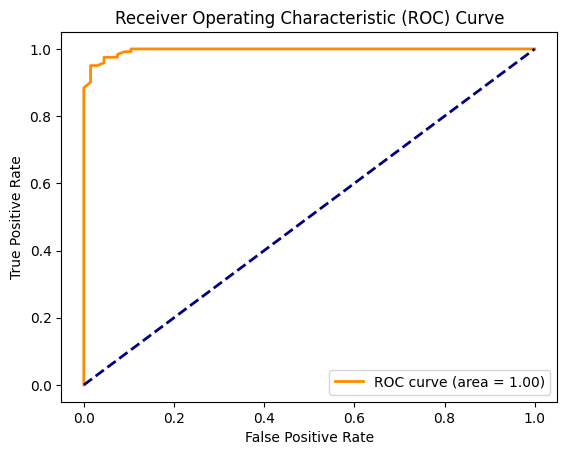

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1])

In [9]:
# A single RandomForest classifier to observe its ROC Curve
clf = RandomForestClassifier()
train_evaluate(clf, X_train, y_train, X_test, y_test)


In [10]:
hyperparameters_list = [
    {"n_estimators": 10, "max_depth": 3, "random_state": 42},
    {"n_estimators": 50, "max_depth": 5, "random_state": 42},
    {"n_estimators": 100, "max_depth": None, "random_state": 42}
]

classifiers = train_multiple_random_forests(X_train, y_train, hyperparameters_list)

# Ensemble
ensemble_predictions = ensemble_predict(classifiers, X_test)

* Let's see how they did!

In [11]:
# Compute metrics using the functions you've implemented
ensemble_accuracy = accuracy(y_test, ensemble_predictions)
ensemble_precision = precision(y_test, ensemble_predictions)
ensemble_recall = recall(y_test, ensemble_predictions)
ensemble_f1 = f1_score(y_test, ensemble_predictions)

print("Ensemble Metrics:")
print("Accuracy:", ensemble_accuracy)
print("Precision:", ensemble_precision)
print("Recall:", ensemble_recall)
print("F1 Score:", ensemble_f1)


Ensemble Metrics:
Accuracy: 0.9574468085106383
Precision: 0.959349593495935
Recall: 0.9752066115702479
F1 Score: 0.9672131147540983


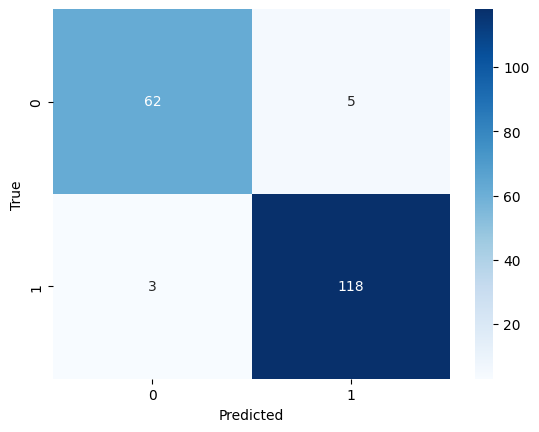

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, ensemble_predictions)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


The ensemble classifier performed very well on the test set, with high scores across all metrics. The model was particularly strong in its recall, meaning it was very effective at identifying positive instances. The high F1 Score suggests a balanced performance in terms of both precision and recall. In essence, the ensemble classifier not only made correct predictions most of the time (high accuracy and precision) but also was especially effective at correctly identifying positive cases without missing many (high recall).